In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

In [2]:
train_CSV = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv"
df = pd.read_csv(train_CSV)

In [3]:
train_image = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words"

# **Exploratory Data Analysis(EDA)**

In [14]:
train_output_folder = "/kaggle/working/train_preprocessed_images"
os.makedirs(train_output_folder, exist_ok=True)

In [15]:
validation_output_folder = "/kaggle/working/valdiation_preprocessed_images"
os.makedirs(validation_output_folder, exist_ok=True)

In [16]:
test_output_folder = "/kaggle/working/test_preprocessed_images"
os.makedirs(test_output_folder, exist_ok=True)

In [17]:
def show_image(title, img):
    plt.figure(figsize=(4, 4))
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

In [18]:
def preprocess_and_save_images(input_folder,output_folder, target_size=(128, 128)):
    image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(input_folder, image_file)
        img = cv2.imread(image_path)
        
        if img is None:
            print(f"Error loading image: {image_file}")
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        resized = cv2.resize(gray, target_size)

        _, binary = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        save_path = os.path.join(output_folder, image_file)
        cv2.imwrite(save_path, binary)

        if i < 5:  
            show_image(f"Processed: {image_file}", binary)

    print(f"Processed {len(image_files)} images and saved to {output_folder}")

In [19]:
train_input_folder = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_words"

In [20]:
validation_input_folder = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words"

In [21]:
test_input_folder = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_words"

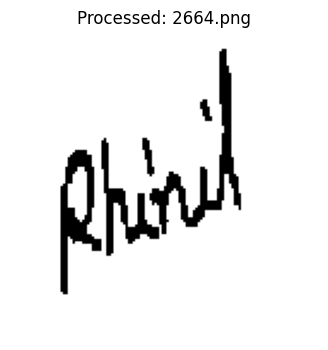

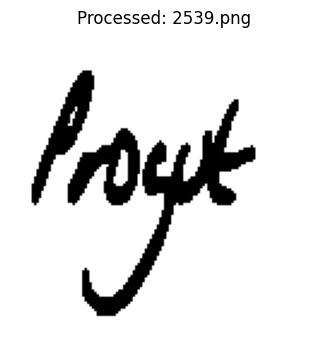

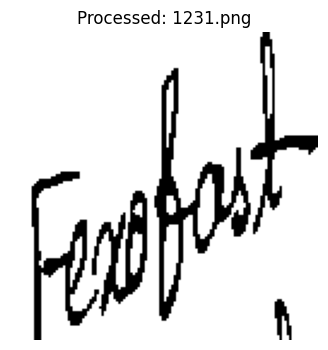

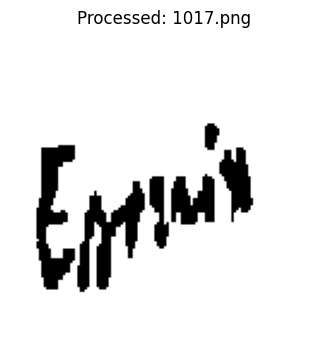

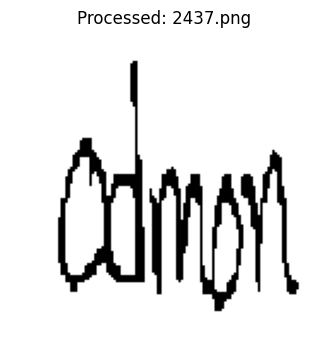

Processed 3120 images and saved to /kaggle/working/train_preprocessed_images


In [22]:
preprocess_and_save_images(train_input_folder,train_output_folder)

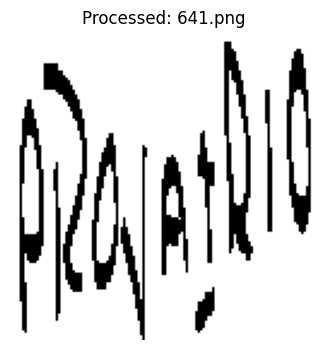

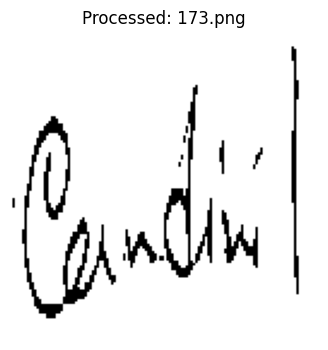

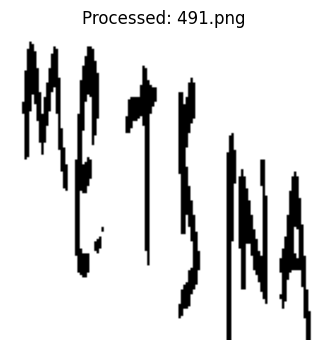

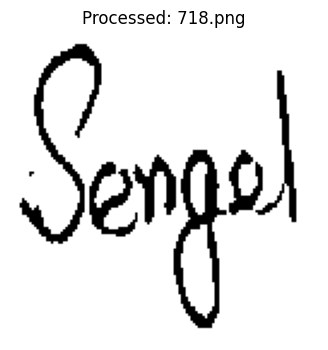

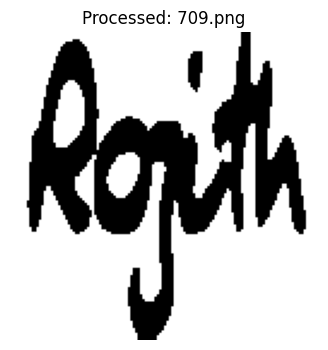

Processed 780 images and saved to /kaggle/working/valdiation_preprocessed_images


In [23]:
preprocess_and_save_images(validation_input_folder,validation_output_folder)

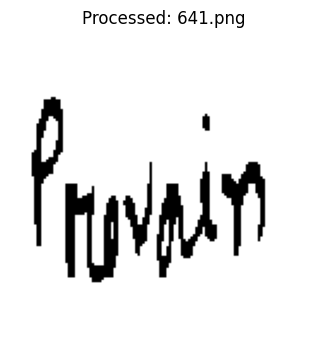

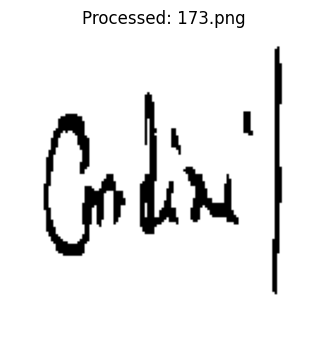

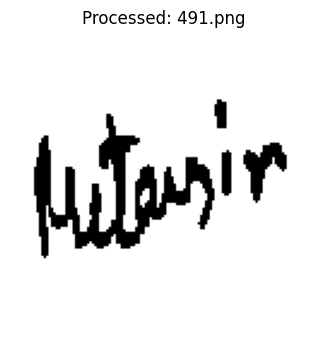

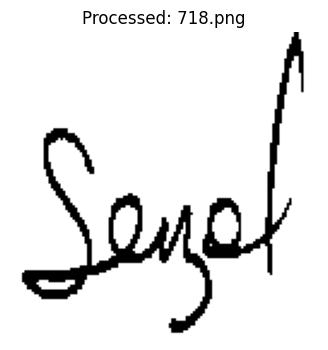

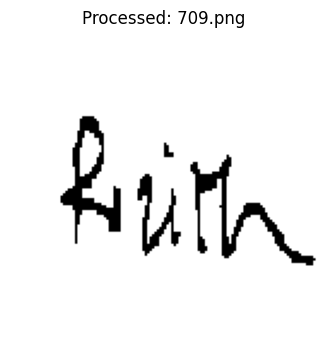

Processed 780 images and saved to /kaggle/working/test_preprocessed_images


In [24]:
preprocess_and_save_images(test_input_folder,test_output_folder)

# **Feature Extraction**

**MobileNetV2**

In [104]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

In [105]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [106]:
# Define base directory where images and CSV files are stored
base_dir = "/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset"  

# Image folders
train_img_dir = os.path.join(base_dir, "Training/training_words") 
val_img_dir = os.path.join(base_dir, "Validation/validation_words")
test_img_dir = os.path.join(base_dir, "Testing/testing_words")

In [107]:
# CSV files containing image names and labels
train_csv =("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Training/training_labels.csv") 
val_csv = ("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv")
test_csv = ("/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Testing/testing_labels.csv") 

In [108]:
train_df = pd.read_csv(train_csv)
val_df = pd.read_csv(val_csv)
test_df = pd.read_csv(test_csv)

In [109]:
# Function to get full image path
def get_image_path(image_name, folder):
    return os.path.join(folder, image_name)

# Add image paths to DataFrames
train_df["image_path"] = train_df["IMAGE"].apply(lambda x: get_image_path(x, train_img_dir))
val_df["image_path"] = val_df["IMAGE"].apply(lambda x: get_image_path(x, val_img_dir))
test_df["image_path"] = test_df["IMAGE"].apply(lambda x: get_image_path(x, test_img_dir))

In [110]:
print(train_df.head())

   IMAGE MEDICINE_NAME GENERIC_NAME  \
0  0.png         Aceta  Paracetamol   
1  1.png         Aceta  Paracetamol   
2  2.png         Aceta  Paracetamol   
3  3.png         Aceta  Paracetamol   
4  4.png         Aceta  Paracetamol   

                                          image_path  
0  /kaggle/input/doctors-handwritten-prescription...  
1  /kaggle/input/doctors-handwritten-prescription...  
2  /kaggle/input/doctors-handwritten-prescription...  
3  /kaggle/input/doctors-handwritten-prescription...  
4  /kaggle/input/doctors-handwritten-prescription...  


In [111]:
print(val_df.head())

   IMAGE MEDICINE_NAME GENERIC_NAME  \
0  0.png         Aceta  Paracetamol   
1  1.png         Aceta  Paracetamol   
2  2.png         Aceta  Paracetamol   
3  3.png         Aceta  Paracetamol   
4  4.png         Aceta  Paracetamol   

                                          image_path  
0  /kaggle/input/doctors-handwritten-prescription...  
1  /kaggle/input/doctors-handwritten-prescription...  
2  /kaggle/input/doctors-handwritten-prescription...  
3  /kaggle/input/doctors-handwritten-prescription...  
4  /kaggle/input/doctors-handwritten-prescription...  


In [112]:
print(test_df.head())

   IMAGE MEDICINE_NAME GENERIC_NAME  \
0  0.png         Aceta  Paracetamol   
1  1.png         Aceta  Paracetamol   
2  2.png         Aceta  Paracetamol   
3  3.png         Aceta  Paracetamol   
4  4.png         Aceta  Paracetamol   

                                          image_path  
0  /kaggle/input/doctors-handwritten-prescription...  
1  /kaggle/input/doctors-handwritten-prescription...  
2  /kaggle/input/doctors-handwritten-prescription...  
3  /kaggle/input/doctors-handwritten-prescription...  
4  /kaggle/input/doctors-handwritten-prescription...  


In [113]:
#for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values
    rotation_range=25,            # Rotate images up to 25 degrees
    width_shift_range=0.1,        # Shift width by 10%
    height_shift_range=0.1,       # Shift height by 10%
    zoom_range=0.2,               # Zoom in/out by 20%
    horizontal_flip=True          # Flip images horizontally
)

In [114]:
# Image data generator for validation and test data (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

In [115]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col="image_path",
    y_col="MEDICINE_NAME",
    target_size=(224, 224),   # Adjust to your model's input size
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 3120 validated image filenames belonging to 78 classes.


In [116]:
val_generator = test_datagen.flow_from_dataframe(
    val_df,
    x_col="image_path",
    y_col="MEDICINE_NAME",
    target_size=(224, 224),   # Adjust to your model's input size
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

Found 780 validated image filenames belonging to 78 classes.


In [117]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col="image_path",
    y_col="MEDICINE_NAME",
    target_size=(224, 224),   # Adjust to your model's input size
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 780 validated image filenames belonging to 78 classes.


In [118]:
num_classes = len(train_generator.class_indices)

In [119]:
print(num_classes)

78


Build and train Model

In [120]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

In [121]:
# Function to build and compile model
def build_model(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

MobileNetV2 Model

In [122]:
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base.trainable = False
mobilenet_model = build_model(mobilenet_base)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [123]:
steps_per_epoch = len(train_generator)
validation_steps = len(val_generator)

In [124]:
print("Training MobileNetV2...")
mobilenet_history = mobilenet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Training MobileNetV2...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.0386 - loss: 4.3705 - val_accuracy: 0.0872 - val_loss: 4.0596
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


98/98 ━━━━━━━━━━━━━━━━━━━━ 101s 996ms/step - accuracy: 0.1397 - loss: 3.8954 - val_accuracy: 0.2038 - val_loss: 3.6328
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 100s 991ms/step - accuracy: 0.2352 - loss: 3.4273 - val_accuracy: 0.2744 - val_loss: 3.2194
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 101s 997ms/step - accuracy: 0.3100 - loss: 2.9785 - val_accuracy: 0.3038 - val_loss: 2.9463
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 101s 993ms/step - accuracy: 0.3709 - loss: 2.6686 - val_accuracy: 0.3782 - val_loss: 2.7057
Epoch 10/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [125]:
mobilenet_model.evaluate(test_generator)

25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 662ms/step - accuracy: 0.1902 - loss: 3.3578


[3.6104989051818848, 0.15000000596046448]

EfficientNetB0 Model


In [129]:
mobilenet_model.save("mobilenet_prescription_model.h5")

# **Fine Tuning**